In [2]:
import os
import sys
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import yahooquery as yq
import random

import matplotlib.pyplot as plt
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

from ConformalMethods import AdaptiveCP, ACP_plots, ACP_data

In [3]:
stock_data = ACP_data.stock_data(10)

In [4]:
ACP = AdaptiveCP(0.1)

In [12]:

def test_on_data(data, ic = [*range(50, 500, 10)], k=2 ):
    MACI_dict = {'coverge':[], 'width':[]}
    ACI_dict = {'coverge':[], 'width':[]}


    for i, data in enumerate(data):
        maci = ACP.MACI(data, interval_candidates=ic, nu_sigma=(3*(10**-4), 0.15), k=k )
    
        aci = ACP.ACI(data, custom_interval=500, startpoint=max(ic))

        MACI_dict['coverge'].append(maci['realised_interval_coverage'])
        MACI_dict['width'].append(maci['average_prediction_interval'])

        ACI_dict['coverge'].append(aci['realised_interval_coverage'])
        ACI_dict['width'].append(aci['average_prediction_interval'])

        if i % 10 == 0:
            print(i)
    
    maci_coverage = np.array(MACI_dict['coverge'])
    maci_width = np.array(MACI_dict['width'])

    aci_coverage = np.array(ACI_dict['coverge'])
    aci_width = np.array(ACI_dict['width'])

    print('MACI coverage:', np.mean(maci_coverage), np.mean(maci_width))
    print('ACI coverage:', np.mean(aci_coverage), np.mean(aci_width))
    


In [17]:
test_on_data(stock_data)

0
MACI coverage: 0.888592236499236 10.123716186020898
ACI coverage: 0.8966241422542085 10.25644257990327


Does mildly better on stock data but this is what you would expect.

In [10]:
random_data = ACP_data.random_multi_shift(25, seq_range=(4000,5000))

In [21]:
test_on_data(random_data)

0
MACI coverage: 0.8936702703743841 108.05044042802857
ACI coverage: 0.8987925314832543 118.88769323622141


In [29]:
test_on_data(random_data, ic = [*range(50, 500, 10), 1000])

0
10
20
MACI coverage: 0.89289425065556 133.66858606678434
ACI coverage: 0.8987313062177009 157.08133064714374


0
10
20
MACI coverage: 0.89289425065556 133.66858606678434
ACI coverage: 0.8987313062177009 157.08133064714374


In [11]:
new_transform = lambda x: np.append(x[:2], 0.5*x[:-2] + 0.5*x[1:-1] + x[2:])
random_data_t = ACP_data.random_multi_shift(25, seq_range=(4000,5000), data_transformation=new_transform)
test_on_data(random_data_t, ic=[*range(50, 500, 10), 1000])


NameError: name 'test_on_data' is not defined

In [22]:
test_on_data(random_data_t, ic=[*range(50, 500, 10), 1000], k=24)

0
10
20
MACI coverage: 0.8966149125295432 105.82496197542162
ACI coverage: 0.8979446870168735 143.01817689133415


In [23]:
test_on_data(random_data_t, ic=[*range(50, 500, 10), 1000], k=15)

0
10
20
MACI coverage: 0.8948533010469791 116.19876467317987
ACI coverage: 0.8979446870168735 143.01817689133415


In [24]:
test_on_data(random_data_t, ic=[*range(50, 500, 10), 1000], k=7)

0
10
20
MACI coverage: 0.8945237916366199 105.29543585860618
ACI coverage: 0.8979446870168735 143.01817689133415


In [25]:
test_on_data(random_data_t, ic=[*range(50, 500, 10), 1000], k=3)

0
10
20
MACI coverage: 0.8931840734555465 118.75461904924059
ACI coverage: 0.8979446870168735 143.01817689133415


In [26]:
test_on_data(random_data_t, ic=[*range(50, 500, 10), 1000], k=1)

0
10
20
MACI coverage: 0.8919680644835631 121.92948939310975
ACI coverage: 0.8979446870168735 143.01817689133415


0
10
20
MACI coverage: 0.8926298661171065 122.26612392841439
ACI coverage: 0.8983992865622299 112.8146127683352


The reason the experiments havent had good results is due to this transformation, I imagine this makes it harder to find the boundary between between when certain heads perform better. You should look into this further.

Does a lot better 10-20% better on multiple shift data when it is not sown together it has a large head.

In [3]:
no_shift_data = ACP_data.no_shift((0,1), 5000, datapoints=5)

In [34]:
test_on_data(no_shift_data)

0
MACI coverage: 0.8942426553038798 21.89636389378871
ACI coverage: 0.899304932735426 35.87935596117005


So now it massivley outperforms, 150 is just an extremely performant head. Hence you would have no issues proving that it is better.

Does a lot better on no shift data as it can use a larger head.

## Investigating why MACI does worse on data with transform

In [9]:
rt = random_data_t[1]
ACP_plots.analyse_MACI(rt, ACP.MACI, [*range(50, 500, 20), 1000], [2000, 3000, 4000],(3*(10**-4), 0.15), 2)

NameError: name 'random_data_t' is not defined

0.8961588541666666


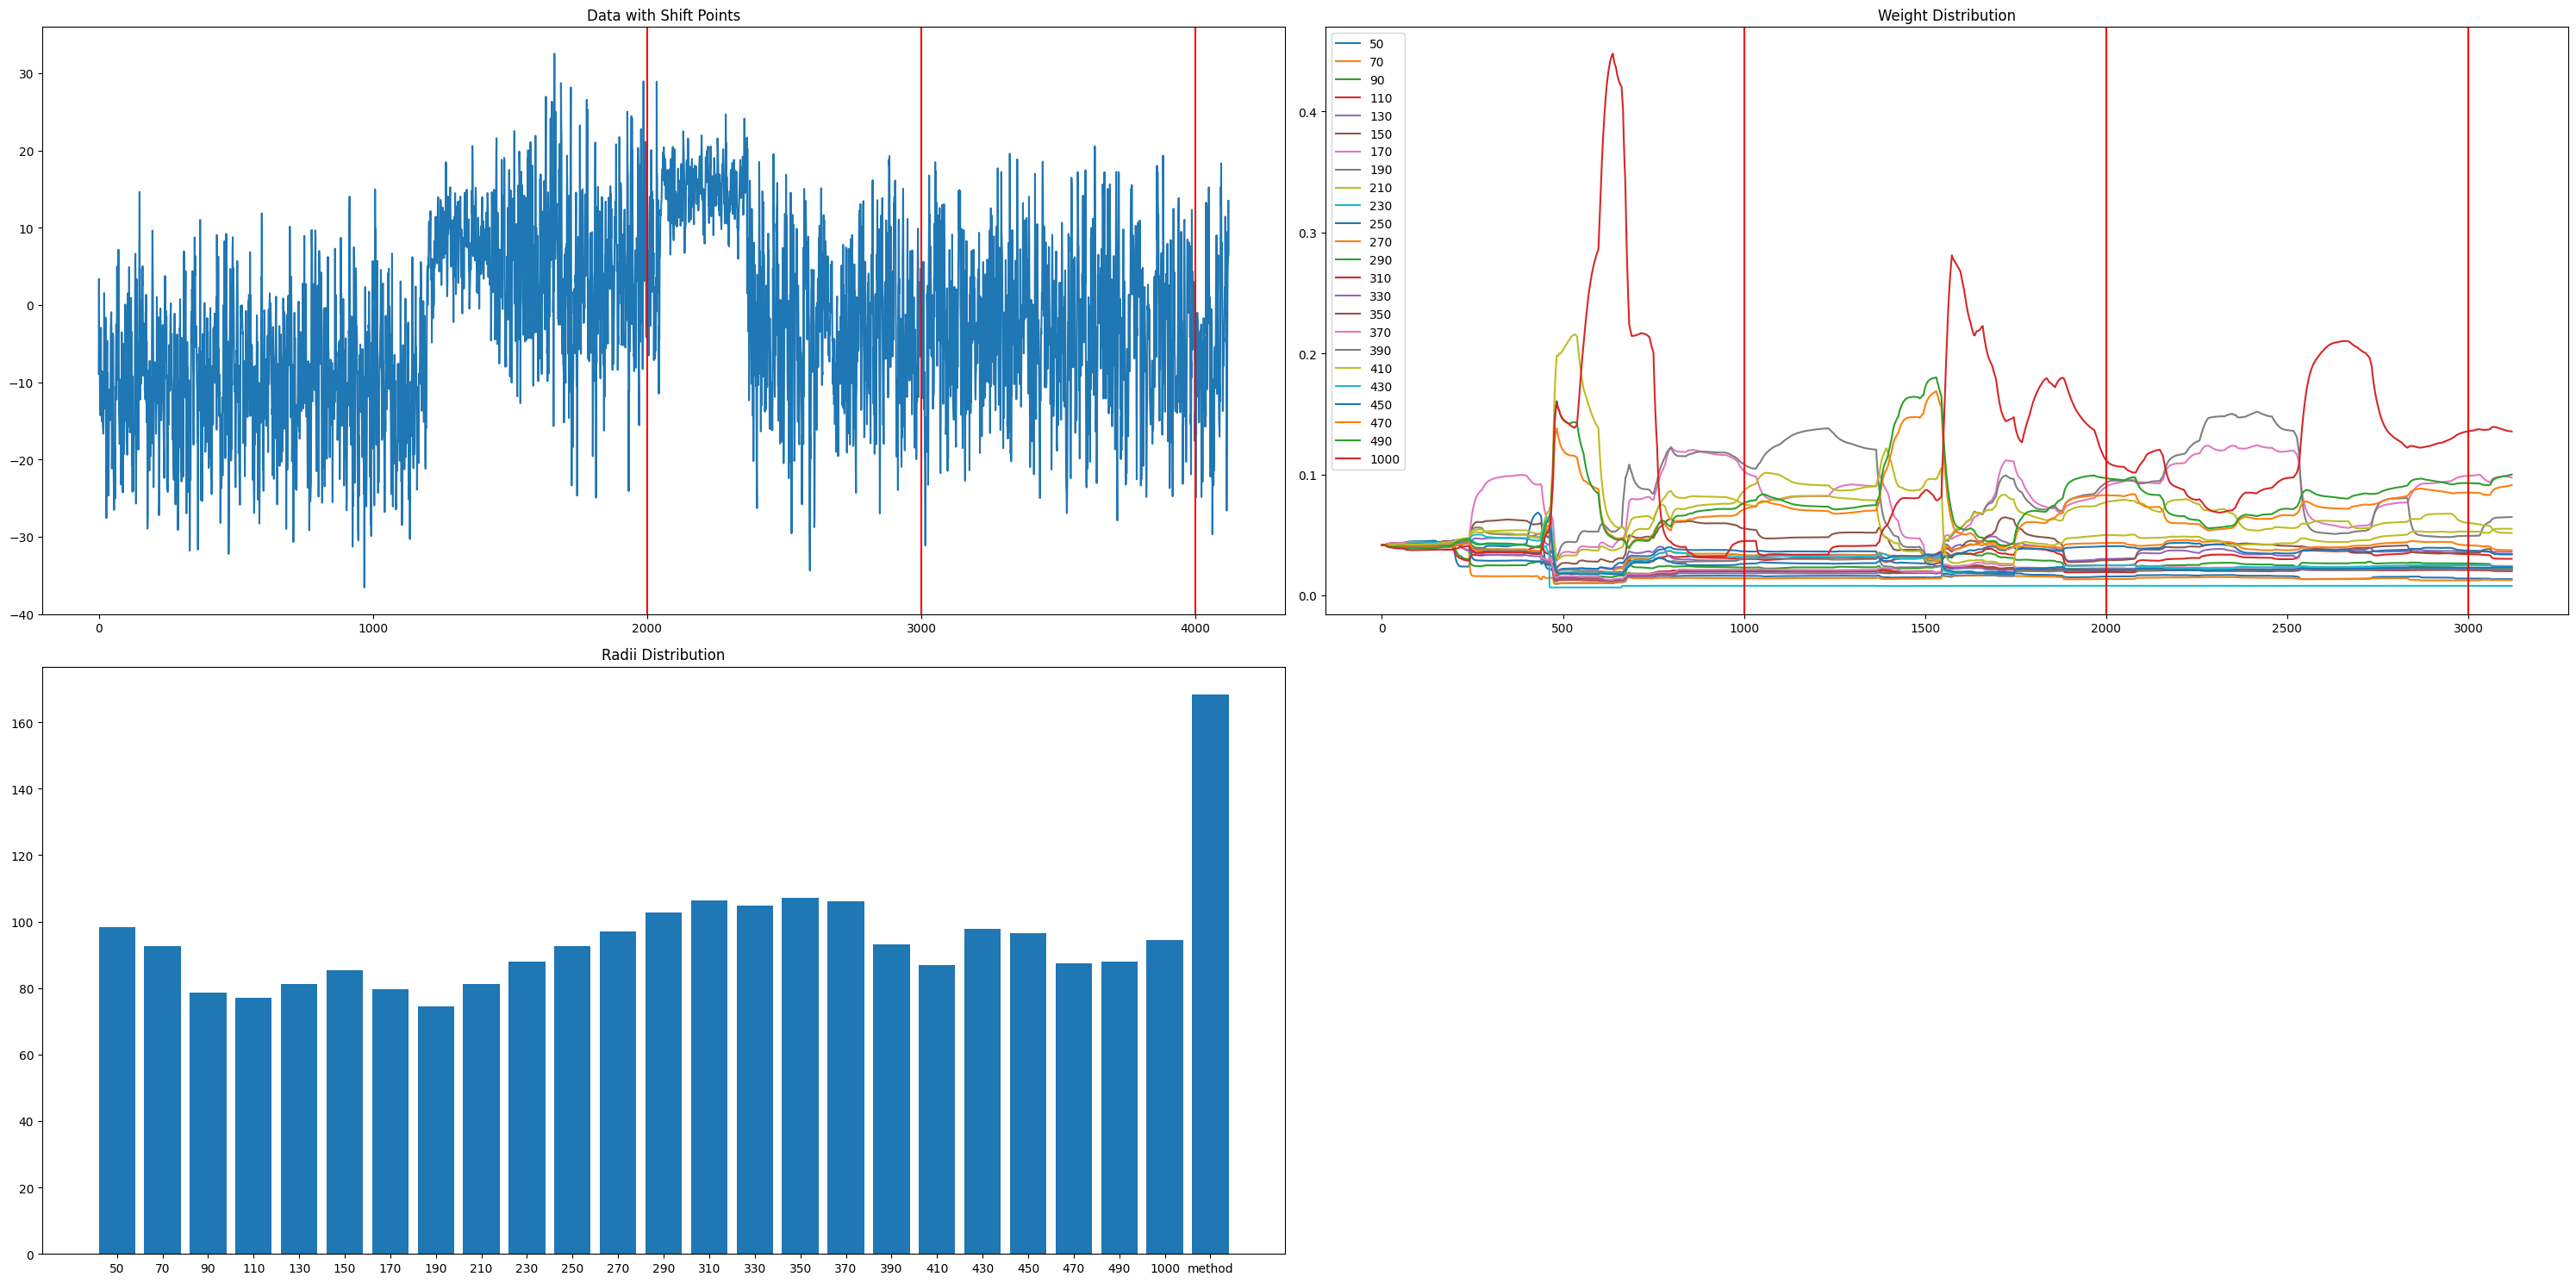

Section: 0 ----------------------------------------------------------------------------------------------------
1000
[(np.int64(0), np.float64(0.0008456091224855302)), (np.int64(1), np.float64(0.0004875063664039354)), (np.int64(2), np.float64(0.0006522383143897658)), (np.int64(3), np.float64(0.0012451567545220142)), (np.int64(4), np.float64(0.0020181161830709)), (np.int64(5), np.float64(0.004106291599993224)), (np.int64(6), np.float64(0.009446241418341031)), (np.int64(7), np.float64(0.00597493923742708)), (np.int64(8), np.float64(0.0049887780852036455)), (np.int64(9), np.float64(0.0014442238706189568)), (np.int64(10), np.float64(0.001228344333478806)), (np.int64(11), np.float64(0.0010046769535980553)), (np.int64(12), np.float64(0.0006898607507462954)), (np.int64(13), np.float64(0.000694963251126574)), (np.int64(14), np.float64(8.121809764449978e-05)), (np.int64(15), np.float64(3.884587238307093e-05)), (np.int64(16), np.float64(0.00012627863750514393)), (np.int64(17), np.float64(0.00021

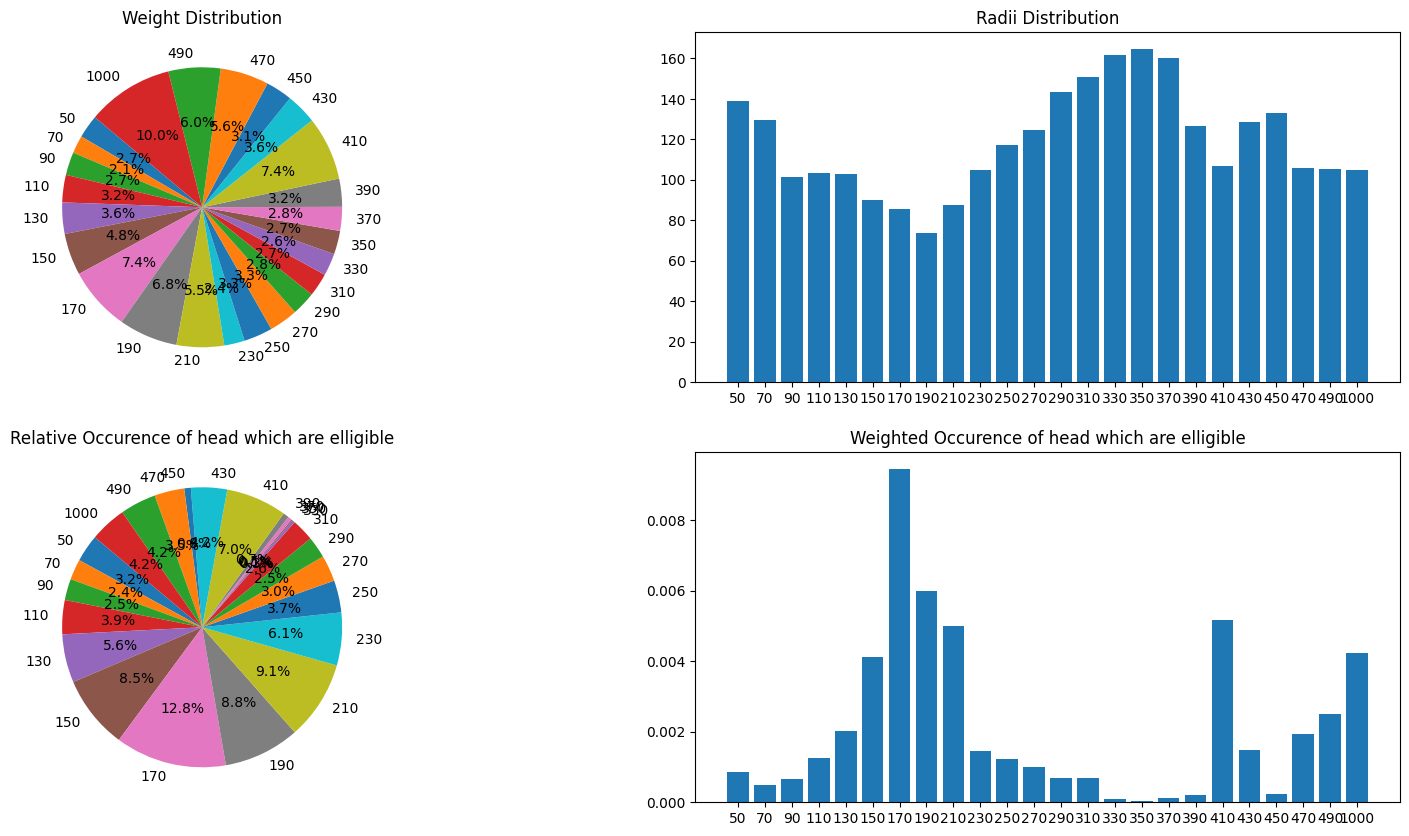

Section: 1 ----------------------------------------------------------------------------------------------------
1000
[(np.int64(0), np.float64(0.0007251517648667484)), (np.int64(1), np.float64(0.0009259604007858822)), (np.int64(2), np.float64(0.0012619969403315826)), (np.int64(3), np.float64(0.002071094766995249)), (np.int64(4), np.float64(0.0017971623437988405)), (np.int64(5), np.float64(0.0008084493746269163)), (np.int64(6), np.float64(0.0007721526063864499)), (np.int64(7), np.float64(0.005016297236546915)), (np.int64(8), np.float64(0.0022310535512330134)), (np.int64(9), np.float64(0.0005219995072735113)), (np.int64(10), np.float64(0.0013293799721978633)), (np.int64(11), np.float64(0.0011465969657945235)), (np.int64(12), np.float64(0.0006443781809940115)), (np.int64(13), np.float64(0.00044396376722563157)), (np.int64(14), np.float64(0.0008763683432370878)), (np.int64(15), np.float64(0.0005039348562057226)), (np.int64(16), np.float64(0.0005685871487089825)), (np.int64(17), np.float64(

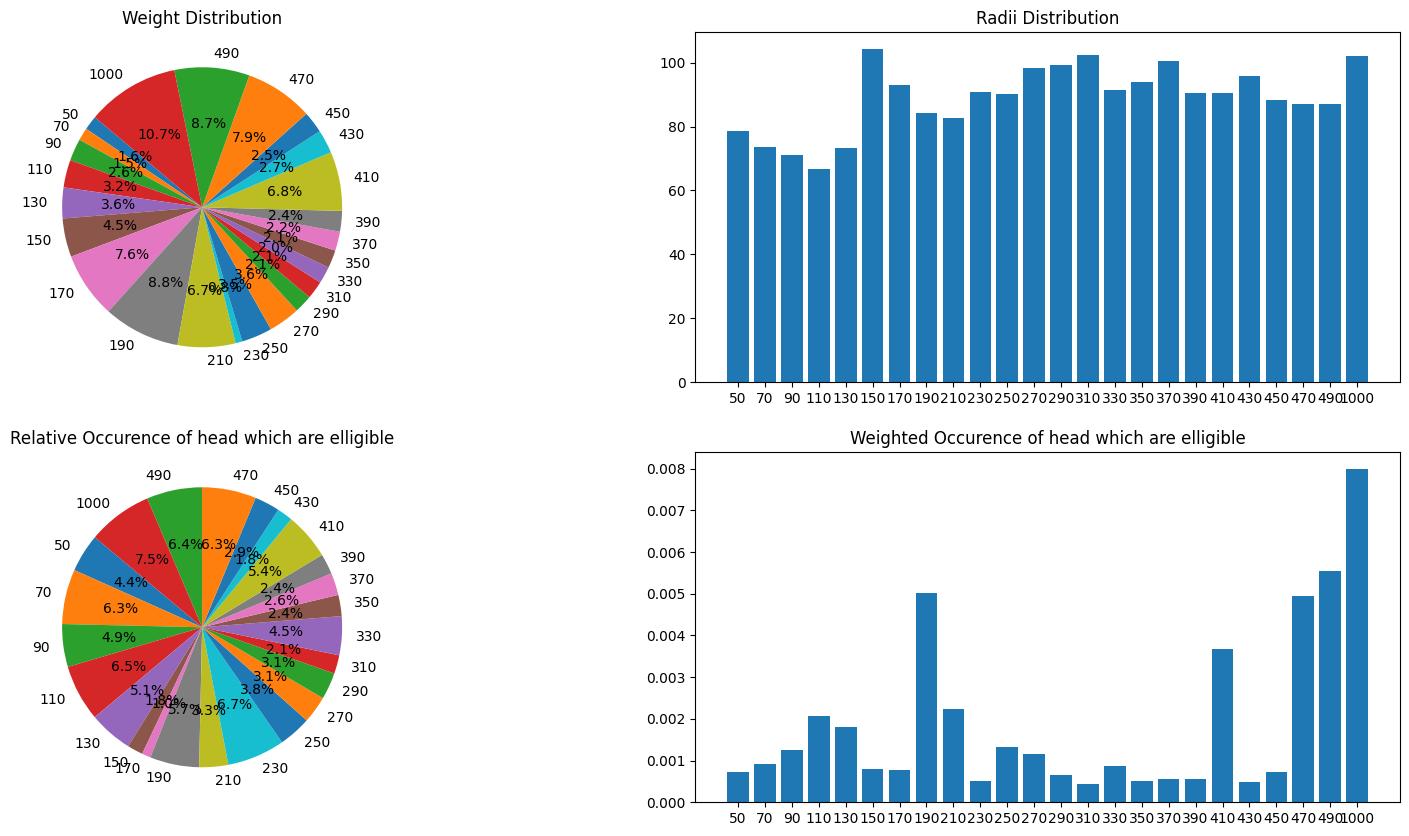

Section: 2 ----------------------------------------------------------------------------------------------------
1000
[(np.int64(0), np.float64(0.0004927765561374296)), (np.int64(1), np.float64(0.0007974131451584079)), (np.int64(2), np.float64(0.001464824444406162)), (np.int64(3), np.float64(0.0019484952744256104)), (np.int64(4), np.float64(0.0017593045429315105)), (np.int64(5), np.float64(0.0023906242678852236)), (np.int64(6), np.float64(0.008026541980116167)), (np.int64(7), np.float64(0.007059409366568777)), (np.int64(8), np.float64(0.0005764755963280576)), (np.int64(9), np.float64(0.0002813603324438234)), (np.int64(10), np.float64(0.0006976562736537512)), (np.int64(11), np.float64(0.0001435574508537953)), (np.int64(12), np.float64(0.001223718094527786)), (np.int64(13), np.float64(0.0005704319922452245)), (np.int64(14), np.float64(0.0001414661062449226)), (np.int64(15), np.float64(4.2205590290034646e-05)), (np.int64(16), np.float64(0.0013682664917062772)), (np.int64(17), np.float64(0.

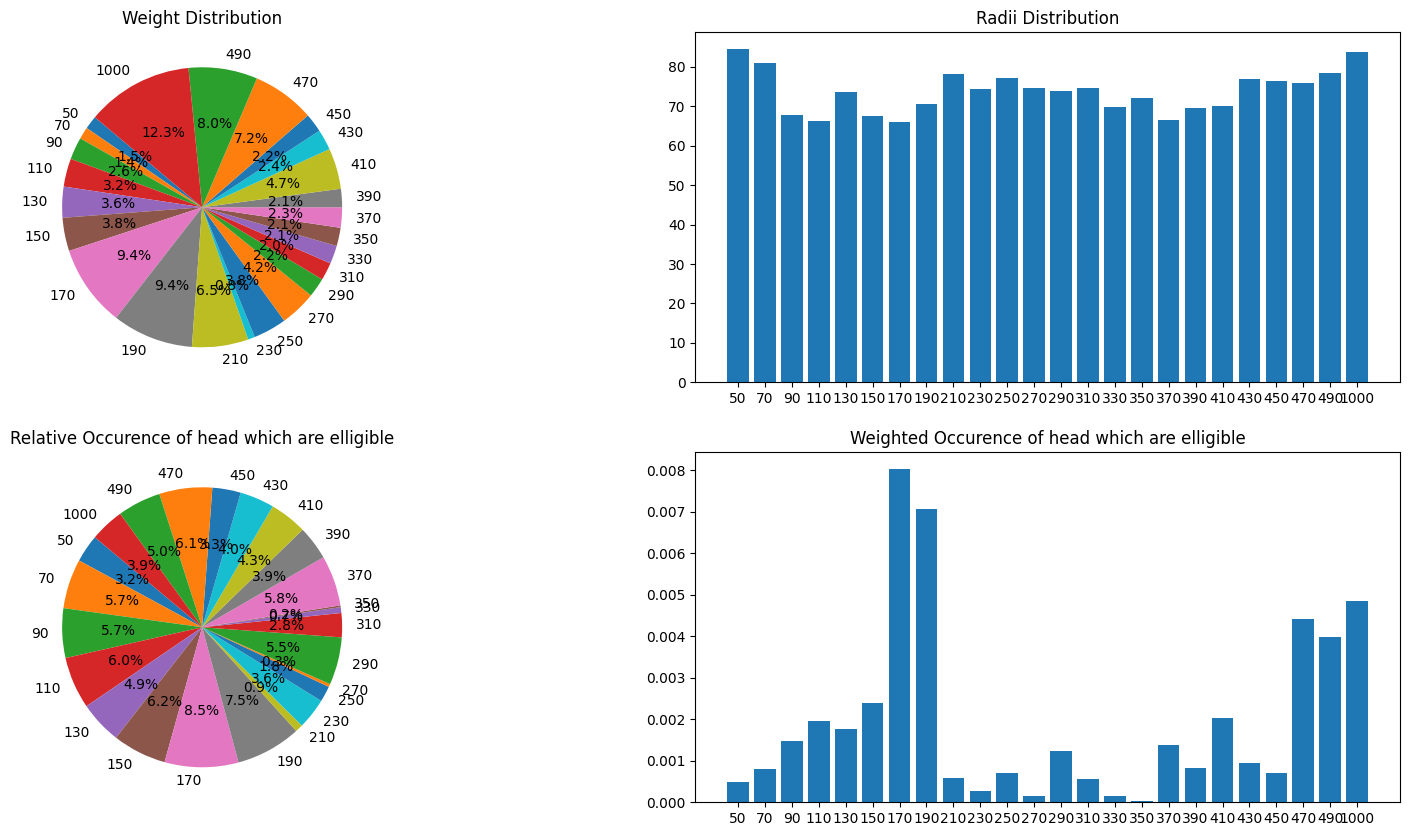

Section: 3 ----------------------------------------------------------------------------------------------------
121
[(np.int64(6), np.float64(0.013943024416268057)), (np.int64(7), np.float64(0.0040747446399390565)), (np.int64(14), np.float64(0.0010273213597988672)), (np.int64(15), np.float64(0.0011471524801436)), (np.int64(16), np.float64(0.0017989861142390323)), (np.int64(17), np.float64(0.001593566696064839)), (np.int64(18), np.float64(0.00764619731528802)), (np.int64(19), np.float64(0.001788149440050284)), (np.int64(20), np.float64(0.0021701344337401647)), (np.int64(21), np.float64(0.007763288653226319)), (np.int64(22), np.float64(0.006598606588804812)), (np.int64(23), np.float64(0.00954758380078158))]


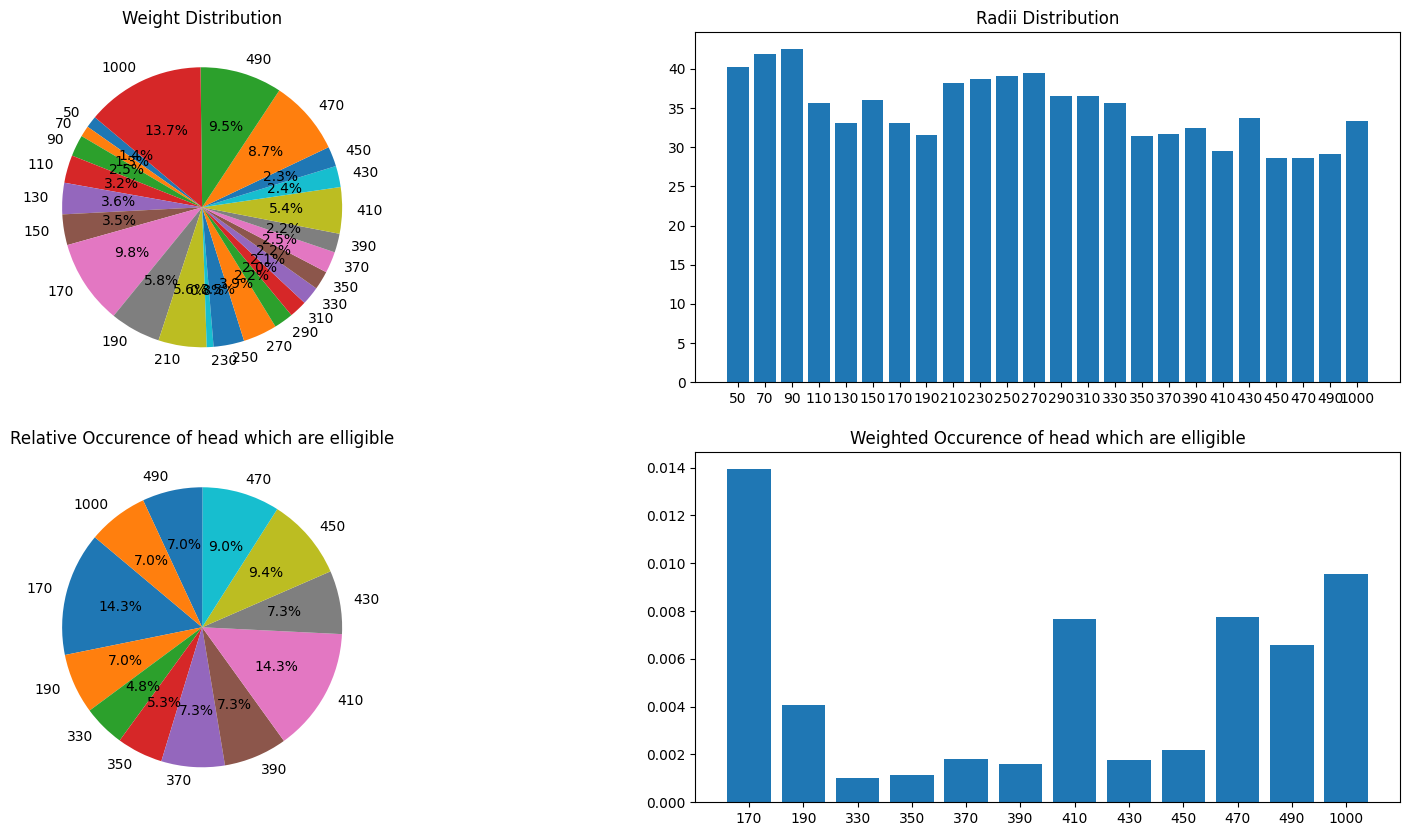

In [29]:
ACP_plots.analyse_MACI(rt, ACP.MACI, [*range(50, 500, 20), 1000], [2000, 3000, 4000],((10**-4), 0.15), 7)

In [24]:
ACP = AdaptiveCP(0.3)

In [25]:
result = ACP.MACI(random_data_t[0], interval_candidates=[*range(50, 500, 20), 1000], nu_sigma=(3*(10**-4), 0.15), k=2, gamma=0.005)

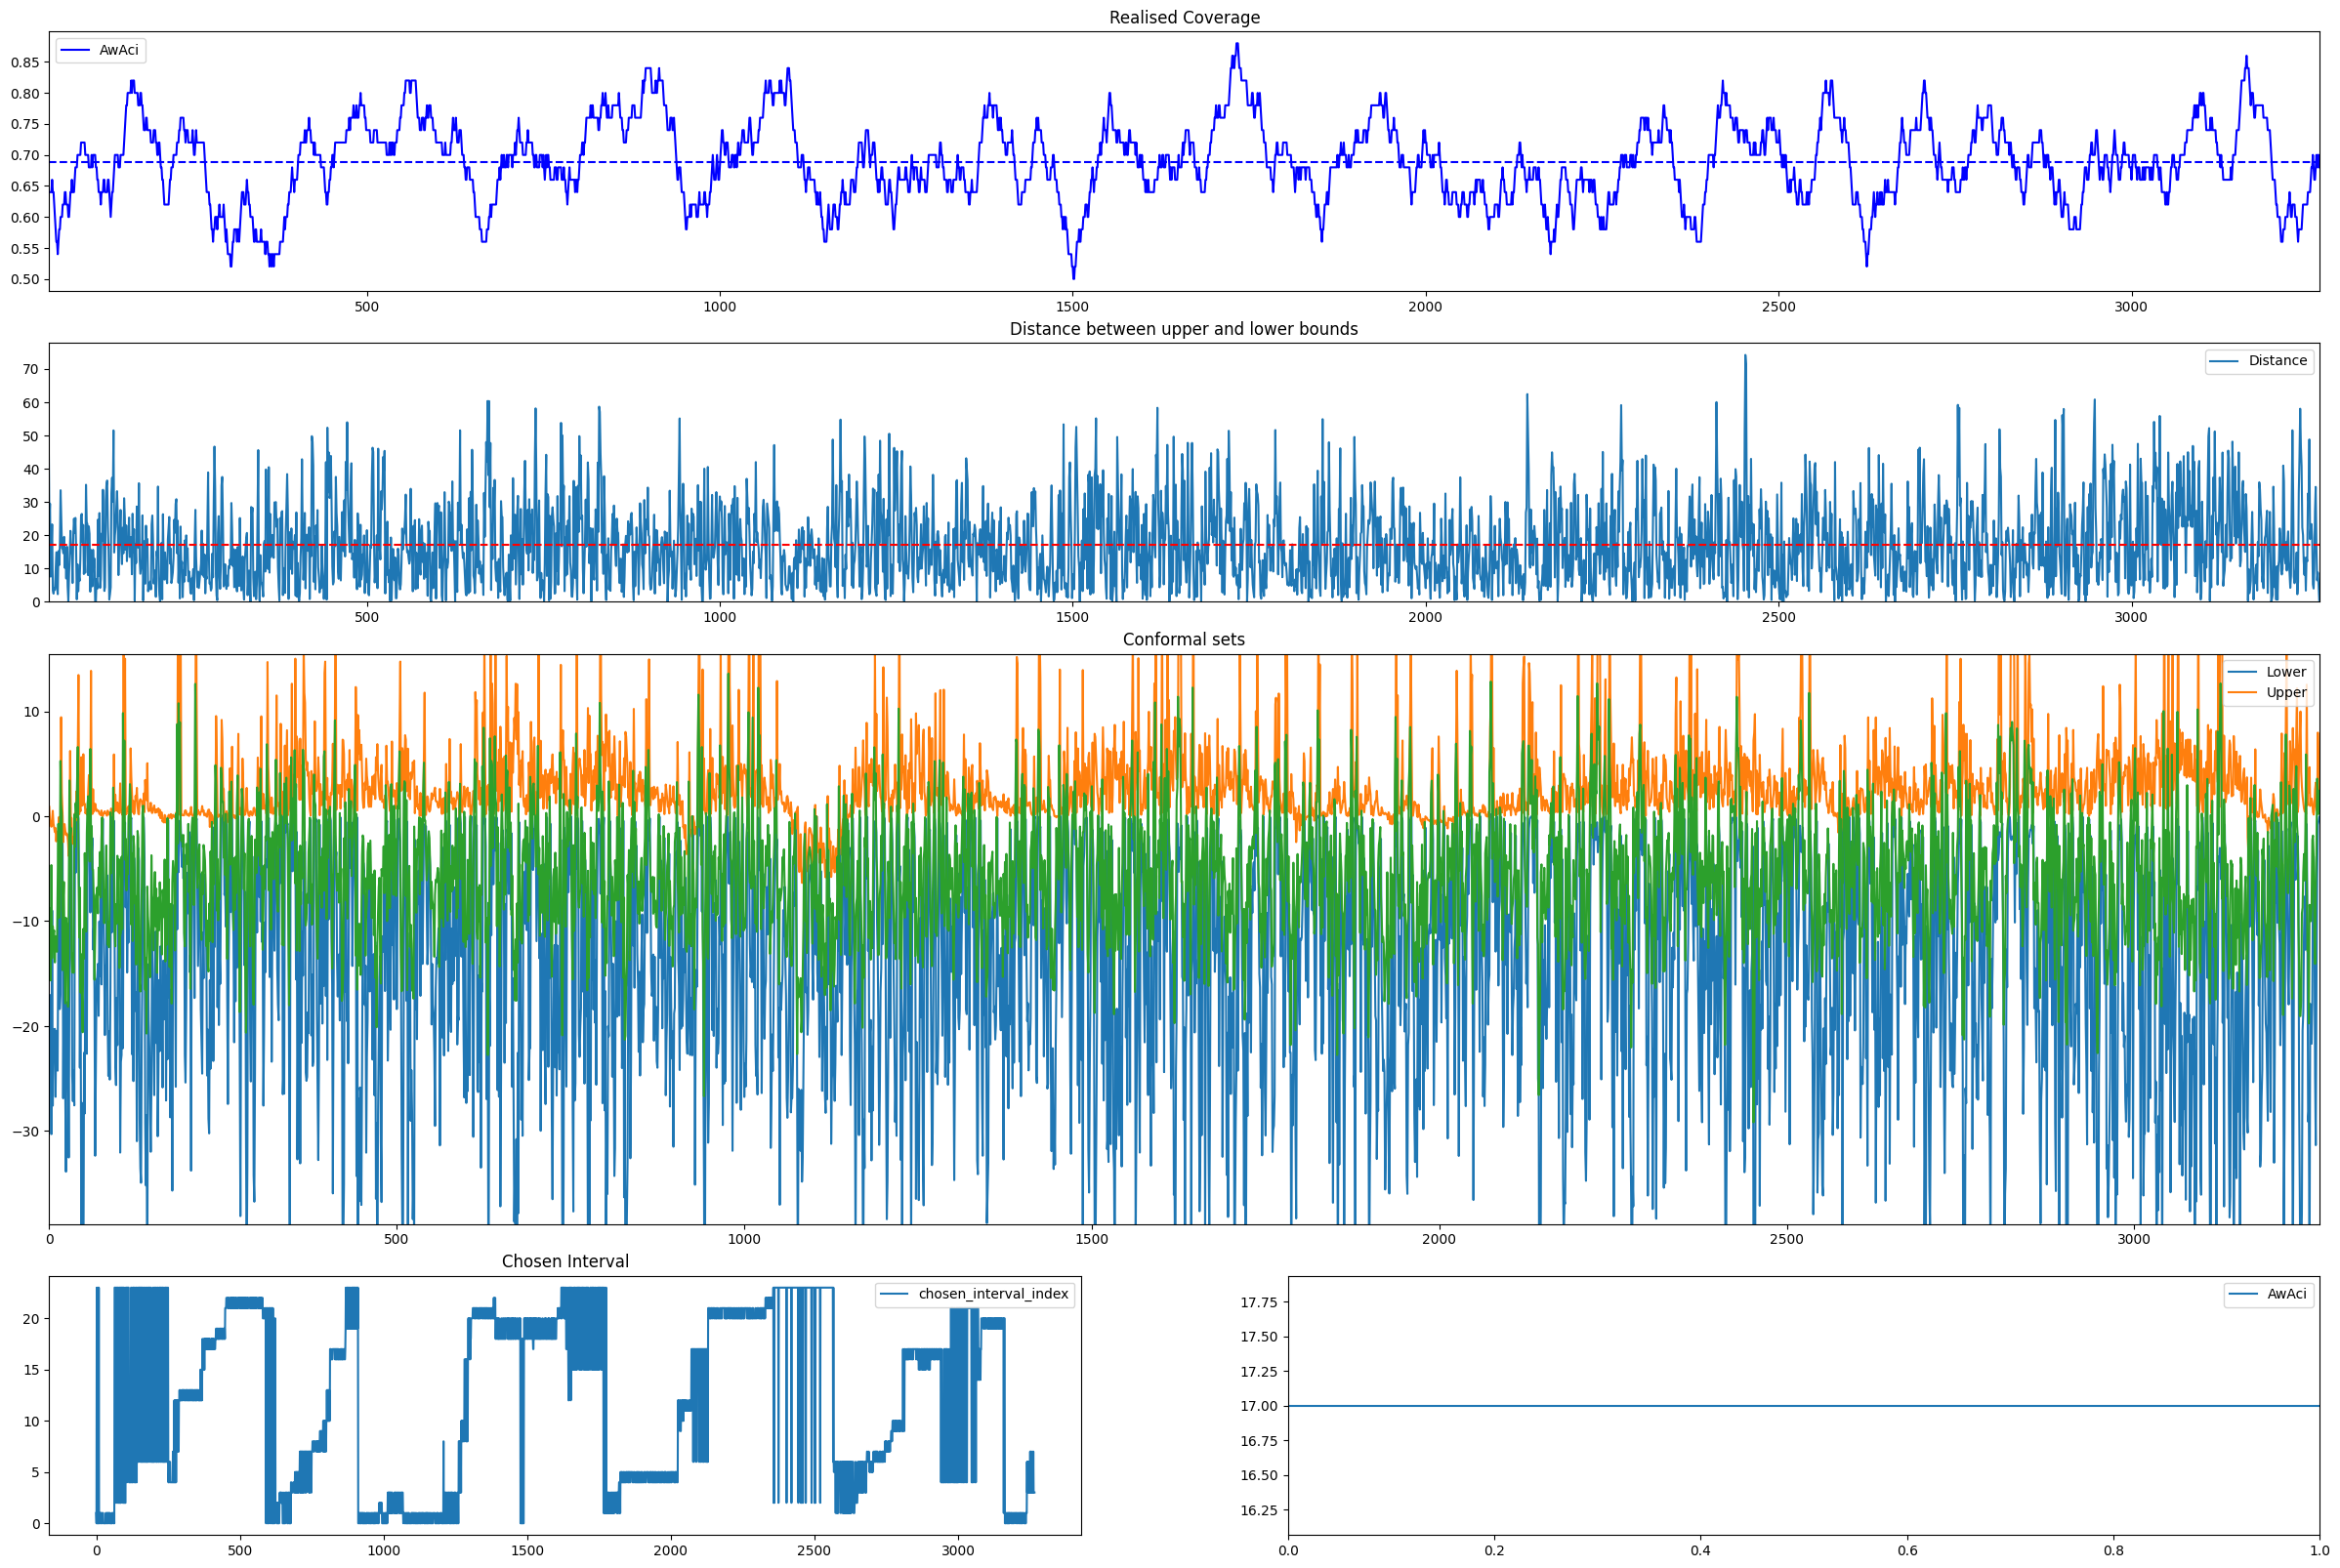

In [26]:
ACP_plots.AwDT_plot(result, random_data_t[0])